In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/covid-19-dataset/covid_19.csv")

# İlk ve son 5 veri
print(df.head())
print(df.tail())


  Province/State Country/Region      Lat     Long        Date  Confirmed  \
0            NaN    Afghanistan  33.0000  65.0000  2020-01-22          0   
1            NaN        Albania  41.1533  20.1683  2020-01-22          0   
2            NaN        Algeria  28.0339   1.6596  2020-01-22          0   
3            NaN        Andorra  42.5063   1.5218  2020-01-22          0   
4            NaN         Angola -11.2027  17.8739  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
      Province/State         Country/Region        Lat       Long        Date  \
38884            NaN  Sao Tome and Principe   0.186360   6.613081  2020-06-18   
38885            NaN                  Yemen  15.552727  4

In [2]:
# Veri seti boyutu
print("Veri boyutu:", df.shape)

Veri boyutu: (38889, 10)


In [3]:
# Sütun isimleri
print("Sütunlar:", df.columns)


Sütunlar: Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')


In [4]:
# Veri tipi ve eksik değer analizi
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38889 entries, 0 to 38888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  11622 non-null  object 
 1   Country/Region  38889 non-null  object 
 2   Lat             38889 non-null  float64
 3   Long            38889 non-null  float64
 4   Date            38889 non-null  object 
 5   Confirmed       38889 non-null  int64  
 6   Deaths          38889 non-null  int64  
 7   Recovered       38889 non-null  int64  
 8   Active          38889 non-null  int64  
 9   WHO Region      38889 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB
None
Province/State    27267
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


In [5]:
# Sayısal değişkenlerin istatistiksel özeti
print(df.describe().T)

             count         mean           std       min      25%      50%  \
Lat        38889.0    21.362269     24.969887  -51.7963   7.5400  23.6850   
Long       38889.0    23.701848     70.158193 -135.0000 -15.3101  21.7587   
Confirmed  38889.0  9020.539613  71003.079205    0.0000   0.0000  77.0000   
Deaths     38889.0   560.147754   4543.654747    0.0000   0.0000   1.0000   
Recovered  38889.0  3402.299082  22340.891460    0.0000   0.0000   9.0000   
Active     38889.0  5058.092777  48628.188388  -14.0000   0.0000  12.0000   

                75%           max  
Lat         41.2044  7.170690e+01  
Long        81.0000  1.780650e+02  
Confirmed  884.0000  2.191052e+06  
Deaths      12.0000  1.184340e+05  
Recovered  294.0000  5.991150e+05  
Active     317.0000  1.473503e+06  


In [7]:
# Benzersiz ülke ve eyalet isimleri
print(df["Province/State"].unique())
print(df["Province/State"].value_counts())

[nan 'Australian Capital Territory' 'New South Wales' 'Northern Territory'
 'Queensland' 'South Australia' 'Tasmania' 'Victoria' 'Western Australia'
 'Alberta' 'British Columbia' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Nova Scotia' 'Ontario'
 'Prince Edward Island' 'Quebec' 'Saskatchewan' 'Anhui' 'Beijing'
 'Chongqing' 'Fujian' 'Gansu' 'Guangdong' 'Guangxi' 'Guizhou' 'Hainan'
 'Hebei' 'Heilongjiang' 'Henan' 'Hong Kong' 'Hubei' 'Hunan'
 'Inner Mongolia' 'Jiangsu' 'Jiangxi' 'Jilin' 'Liaoning' 'Macau' 'Ningxia'
 'Qinghai' 'Shaanxi' 'Shandong' 'Shanghai' 'Shanxi' 'Sichuan' 'Tianjin'
 'Tibet' 'Xinjiang' 'Yunnan' 'Zhejiang' 'Faroe Islands' 'Greenland'
 'French Guiana' 'French Polynesia' 'Guadeloupe' 'Mayotte' 'New Caledonia'
 'Reunion' 'Saint Barthelemy' 'St Martin' 'Martinique' 'Aruba' 'Curacao'
 'Sint Maarten' 'Bermuda' 'Cayman Islands' 'Channel Islands' 'Gibraltar'
 'Isle of Man' 'Montserrat' 'Northwest Territories' 'Yukon' 'Anguilla'
 'British Virgin Islands' 'Turks and 

**En Fazla Vaka Sayısına Sahip İlk 10 Ülke**

In [9]:
top_confirmed = df.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10)
print("En fazla vaka sayısına sahip ilk 10 ülke:")
print(top_confirmed)


En fazla vaka sayısına sahip ilk 10 ülke:
Country/Region
US                102003981
Brazil             22635171
Russia             18191073
Spain              17444321
Italy              17299484
United Kingdom     15744774
Germany            13313882
France             13140604
China              10810346
Turkey              9798853
Name: Confirmed, dtype: int64


**En Yüksek Ölüm Oranına Sahip İlk 10 Ülke**

In [11]:
df["Fatality_Rate"] = df["Deaths"] / df["Confirmed"]
df["Fatality_Rate"] = df["Fatality_Rate"].replace([float('inf'), -float('inf')], 0).fillna(0)

top_fatality = df.groupby("Country/Region")["Fatality_Rate"].mean().sort_values(ascending=False).head(10)
print("Ortalama ölüm oranı en yüksek 10 ülke:")
print(top_fatality)


Ortalama ölüm oranı en yüksek 10 ülke:
Country/Region
Philippines    0.122642
Sudan          0.114317
Nicaragua      0.093218
Guyana         0.091118
Italy          0.089983
Belgium        0.081261
Yemen          0.069499
Spain          0.067664
Bahamas        0.066585
Gambia         0.064407
Name: Fatality_Rate, dtype: float64


**En Yüksek Aktif Vaka Sayısına Sahip Ülkeler**

In [12]:
top_active = df.groupby("Country/Region")["Active"].sum().sort_values(ascending=False).head(10)
print("En yüksek aktif vaka sayısına sahip 10 ülke:")
print(top_active)


En yüksek aktif vaka sayısına sahip 10 ülke:
Country/Region
US                76222114
United Kingdom    13414949
Russia            11183955
Brazil            10975830
France             7111661
Italy              6781459
Spain              6289367
Canada             4758001
India              4542876
Peru               3849420
Name: Active, dtype: int64


**WHO Bölgesine Göre Toplam Vaka ve Ölüm Sayısı**

In [13]:
who_grouped = df.groupby("WHO Region")[["Confirmed", "Deaths"]].sum().sort_values(by="Confirmed", ascending=False)
print("WHO bölgesine göre toplam vakalar ve ölümler:")
print(who_grouped)


WHO bölgesine göre toplam vakalar ve ölümler:
                       Confirmed    Deaths
WHO Region                                
Americas               152899771   8460158
Europe                 136225268  11383877
Eastern Mediterranean   27049407    790899
Western Pacific         17058948    631283
South-East Asia         12641726    382133
Africa                   4924645    135236


**Zaman Serisi: Tüm Dünya Günlük Toplam Vaka Sayısı**

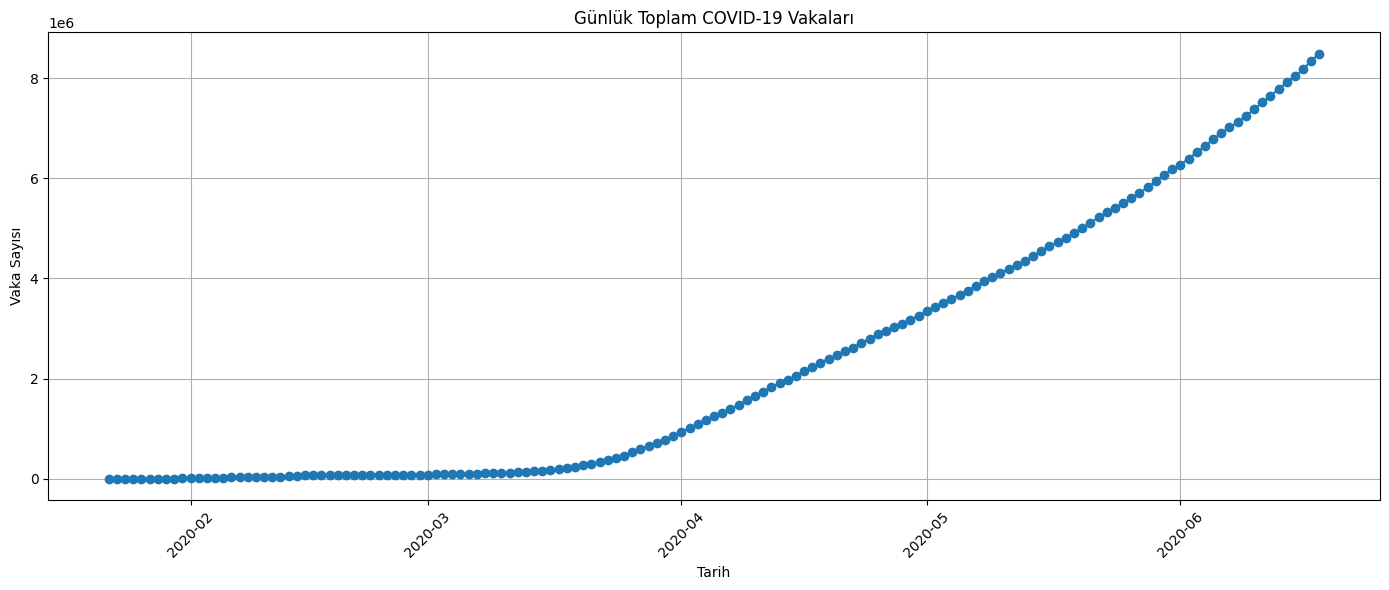

In [14]:
# Tarih sütununu datetime formatına çevir
df["Date"] = pd.to_datetime(df["Date"])

# Günlük toplam vaka sayısı
daily_confirmed = df.groupby("Date")["Confirmed"].sum()

# Basit bir çizim (Kaggle ortamında grafik için matplotlib gerekiyor)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_confirmed.index, daily_confirmed.values, marker='o', linestyle='-')
plt.title("Günlük Toplam COVID-19 Vakaları")
plt.xlabel("Tarih")
plt.ylabel("Vaka Sayısı")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**En Düşük Toplam Vaka Sayısına Sahip Ülkeler (İlk 10)**

In [16]:
lowest_confirmed = df.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=True).head(10)
print("Toplam vakası en az 10 ülke:")
print(lowest_confirmed)


Toplam vakası en az 10 ülke:
Country/Region
Lesotho                    97
Western Sahara            514
Papua New Guinea          543
Holy See                  888
Seychelles                975
Greenland                 999
Saint Kitts and Nevis    1145
Belize                   1342
Dominica                 1357
Fiji                     1393
Name: Confirmed, dtype: int64


**Toparlanma (Recovery) Oranı Analizi**

In [18]:
df["Recovery/Rate"] = df["Recovered"] / df["Confirmed"]
df["Recovery/Rate"] = df["Recovery/Rate"].replace([float('inf'), -float('inf')], 0).fillna(0)

top_recovery = df.groupby("Country/Region")["Recovery/Rate"].mean().sort_values(ascending=False).head(10)
print("En yüksek ortalama iyileşme oranına sahip 10 ülke:")
print(top_recovery)


En yüksek ortalama iyileşme oranına sahip 10 ülke:
Country/Region
China          0.758412
Cambodia       0.663352
Vietnam        0.596753
Thailand       0.595118
Greenland      0.504054
South Korea    0.500594
Australia      0.478451
Malaysia       0.478182
Brunei         0.476961
Germany        0.462502
Name: Recovery/Rate, dtype: float64


**Korelasyon Matrisi ve Heatmap Çizimi**

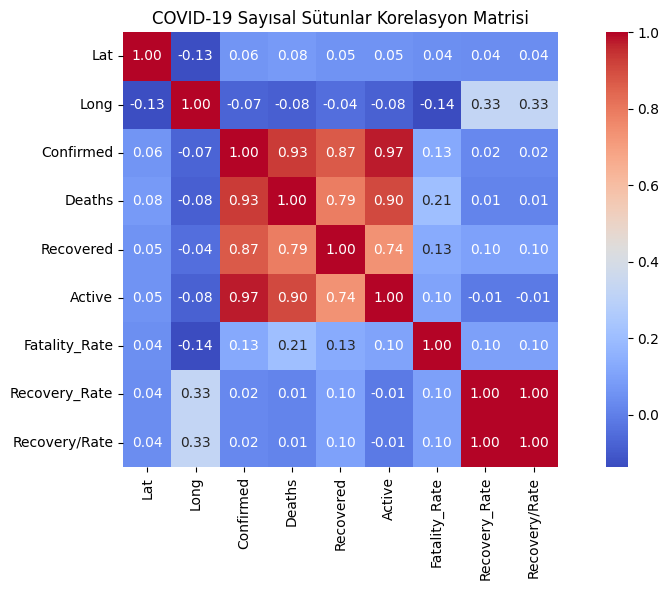

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns


# Sadece sayısal sütunları filtrele
numeric_cols = df.select_dtypes(include='number')

# Korelasyon matrisi oluştur
correlation_matrix = numeric_cols.corr()

# Heatmap ile korelasyonları görselleştir
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, 
            annot=True,       # Sayıları göster
            fmt=".2f",        # Ondalık format
            cmap="coolwarm",  # Renk skalası
            square=True)      # Hücreleri kare yap
plt.title("COVID-19 Sayısal Sütunlar Korelasyon Matrisi")
plt.tight_layout()
plt.show()
